# **Diabetic Classification Task**

### Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#----------------------------- import library -----------------------------
import pandas as pd


In [ ]:
# ----------------------------- load data -----------------------------
diabetes_dataset = "/content/drive/MyDrive/diabetes_dataset.csv"
df = pd.read_csv(diabetes_dataset)
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [ ]:
#number of rows
num_rows = df.shape[0]
print(num_rows)

100000


### Data Cleaning:

In [ ]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64


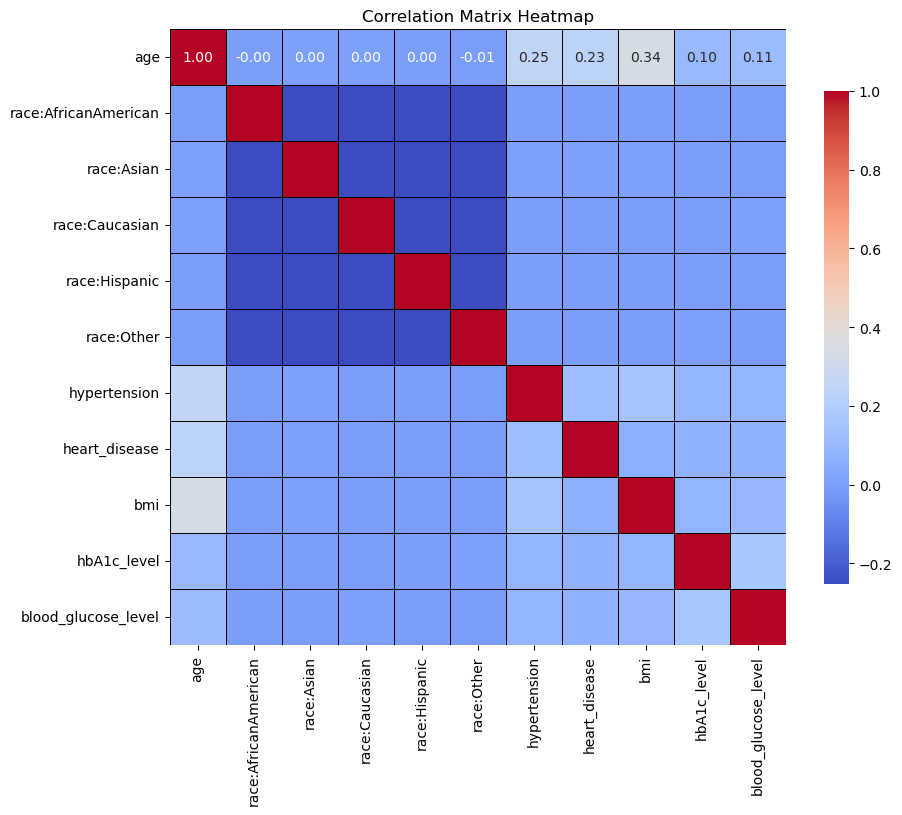

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Drop target and irrelevant columns
columns_to_exclude = ['diabetes', 'year', 'location', 'gender', 'smoking_history']
df_features = df.drop(columns=columns_to_exclude, errors='ignore')

# Select only numeric columns
df_features_numeric = df_features.select_dtypes(include=[np.number])

# Normalize numeric features
df_normalized = (df_features_numeric - df_features_numeric.min()) / (df_features_numeric.max() - df_features_numeric.min())

# Calculate the correlation matrix
correlation_matrix = df_normalized.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8}, linewidths=.5, linecolor='black')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
# Remove rows with missing values since only 18
df = df.dropna()

# Confirm that there are no more missing values
missing_values_after = df.isnull().sum()
print(missing_values_after)

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64


In [ ]:
#number of rows
num_rows = df.shape[0]
print(num_rows)

100000


In [ ]:
# ----------------------------- Duplicates -----------------------------
# Checking for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 14


In [ ]:
df = df.drop_duplicates() #Dropping duplicates as only 14 rows, doesn't affect data size much

In [ ]:
#number of rows after dropping duplicate rows
num_rows = df.shape[0]
print(num_rows)

99986


In [ ]:
#displaying outliers through box plot before removing them

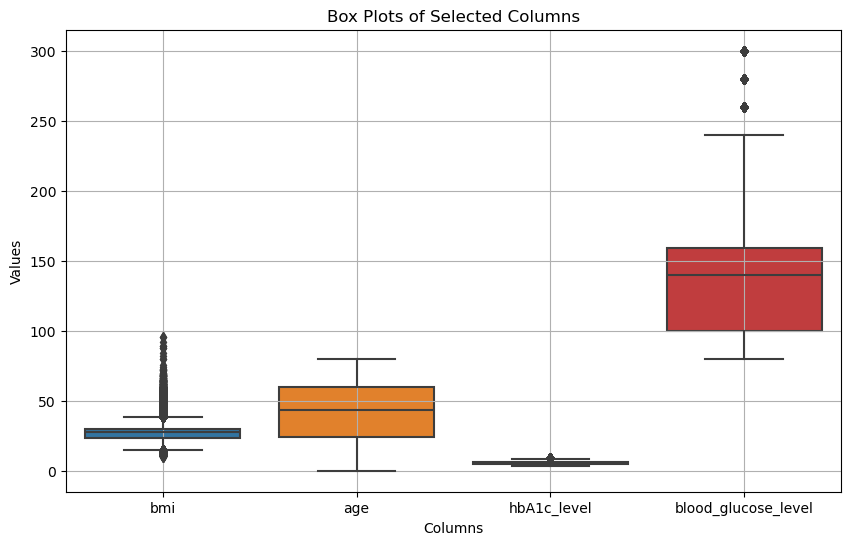

In [ ]:
# ----------------------------- Identify outliers -----------------------------
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_check = ['bmi', 'age', 'hbA1c_level', 'blood_glucose_level'] #These are the columns we need to check outlier for
# Melt the dataframe to plot all columns together
df_melted = df.melt(value_vars=columns_to_check)

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=df_melted)

# Add labels and title
plt.title('Box Plots of Selected Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [ ]:
# Function to remove outliers using IQR and return the cleaned DataFrame
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Outlier bounds for {column}: Lower = {lower_bound}, Upper = {upper_bound}")

    # Identify the number of outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    num_outliers = outliers.shape[0]
    print(f"Number of outliers in {column}: {num_outliers}")

    # Remove the outliers and return the cleaned DataFrame
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df, num_outliers

# Initialize a variable to keep track of total outliers removed
total_outliers = 0

# Loop through each column, remove outliers, and count them
for column in columns_to_check:
    df, num_outliers = remove_outliers(df, column)  # Update the DataFrame and get the count of outliers
    total_outliers += num_outliers

# Print the total number of outliers removed
print(f"Total number of outliers removed: {total_outliers}")

# The original DataFrame `df` is now updated with outliers removed

Outlier bounds for bmi: Lower = 14.705, Upper = 38.504999999999995
Number of outliers in bmi: 7086
Outlier bounds for age: Lower = -30.0, Upper = 114.0
Number of outliers in age: 0
Outlier bounds for hbA1c_level: Lower = 2.6999999999999993, Upper = 8.3
Number of outliers in hbA1c_level: 1110
Outlier bounds for blood_glucose_level: Lower = 11.5, Upper = 247.5
Number of outliers in blood_glucose_level: 1417
Total number of outliers removed: 9613


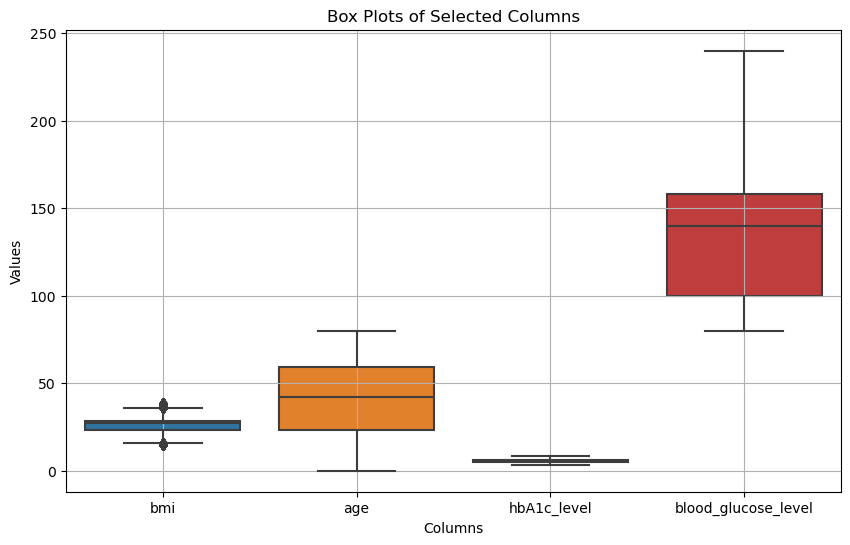

In [ ]:
#displaying outliers through box plot after removing them
# ----------------------------- Identify outliers -----------------------------
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_check = ['bmi', 'age', 'hbA1c_level', 'blood_glucose_level'] #These are the columns we need to check outlier for
# Melt the dataframe to plot all columns together
df_melted = df.melt(value_vars=columns_to_check)

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=df_melted)

# Add labels and title
plt.title('Box Plots of Selected Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [ ]:
#number of rows after dropping outliers because it doesn't affect our data size much
num_rows = df.shape[0]
print(num_rows)

90373


In [ ]:
df_cleaned = df  # make copy of dataframe
df_cleaned

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0


### Data transformation:

In [ ]:
# -----------------------------Converting Data Types -----------------------------
# since races are already one hot encoded, we won't change them
# since locations are many and not as such contributing to the prediction we can label encode them.
# we one-hot encode gender and smoking_history

# Convert categorical cols to 'category' data type so they aren't treated as strings
categorical_cols = ['gender', 'location', 'smoking_history', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other','hypertension','heart_disease','diabetes']
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].astype('category')

In [ ]:
# -----------------------------Encoding Categorical Variables -----------------------------
# One-Hot Encoding for specified columns
columns_to_encode = ['gender', 'smoking_history']
df_cleaned = pd.get_dummies(df_cleaned, columns=columns_to_encode, drop_first=True)


In [ ]:
# Get unique values of the 'location' column as a list
unique_locations = df_cleaned['location'].cat.categories.tolist()  # For categorical data
print(unique_locations)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'United States', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [ ]:
#applying label encoding on location
# Step 1: Create a mapping for all unique locations to unique integers
unique_locations = df_cleaned['location'].cat.categories.tolist()  # Get unique locations
location_mapping = {location: idx for idx, location in enumerate(unique_locations, start=1)}  # Start numbering from 1

# Map the locations to their corresponding integers
df_cleaned['Location'] = df_cleaned['location'].map(location_mapping)

# Step 2: Drop the original location column
df_cleaned.drop(columns=['location'], inplace=True)

# Step 3: Rename the new Location column to location
df_cleaned.rename(columns={'Location': 'location'}, inplace=True)

In [ ]:
# Convert boolean columns to integers
df_cleaned['gender_Male'] = df_cleaned['gender_Male'].astype(int)
df_cleaned['smoking_history_ever'] = df_cleaned['smoking_history_ever'].astype(int)
df_cleaned['smoking_history_former'] = df_cleaned['smoking_history_former'].astype(int)
df_cleaned['smoking_history_never'] = df_cleaned['smoking_history_never'].astype(int)
df_cleaned['smoking_history_not current'] = df_cleaned['smoking_history_not current'].astype(int)

# Check the updated DataFrame
df_cleaned

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,...,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,location
0,2020,32.0,0,0,0,0,1,0,0,27.32,...,100,0,0,False,False,0,0,1,0,1
1,2015,29.0,0,1,0,0,0,0,0,19.95,...,90,0,0,False,False,0,0,1,0,1
2,2015,18.0,0,0,0,0,1,0,0,23.76,...,160,0,1,False,False,0,0,1,0,1
3,2015,41.0,0,0,1,0,0,0,0,27.32,...,159,0,1,False,False,0,0,1,0,1
4,2016,52.0,1,0,0,0,0,0,0,23.75,...,90,0,0,False,False,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,33.0,0,0,0,0,1,0,0,21.21,...,90,0,0,False,False,0,0,1,0,55
99996,2016,80.0,0,1,0,0,0,0,0,36.66,...,100,0,0,False,False,0,0,0,0,55
99997,2018,46.0,0,1,0,0,0,0,0,36.12,...,158,0,1,False,False,1,0,0,0,55
99998,2018,51.0,1,0,0,0,0,0,0,29.29,...,155,0,0,False,False,0,0,0,1,55


### Data Validation

In [ ]:
# Define the valid ranges for each variable
valid_ranges = {
    'year': (1900, 2024),  # Current year is 2024
    'age': (0, 120),
    'bmi': (10, 60),
    'hbA1c_level': (2, 20),  # Percentage values
    'blood_glucose_level': (40, 500)  # mg/dL
}

# Function to check if values fall within the specified range
def check_column_ranges(df, column, valid_range):
    lower, upper = valid_range
    invalid_values = df[(df[column] < lower) | (df[column] > upper)]
    return invalid_values

# Dictionary to store invalid values for each column
invalid_data = {}

# Loop through each column and check if values fall within the valid range
for column, valid_range in valid_ranges.items():
    invalid = check_column_ranges(df, column, valid_range)
    if not invalid.empty:
        invalid_data[column] = invalid

# Output the summary of invalid data
if invalid_data:
    for column, invalid in invalid_data.items():
        print(f"Invalid values found in column '{column}':")
        print(invalid[[column]])  # Display only the column with invalid values
        print(f"Total invalid values: {len(invalid)}\n")
else:
    print("All data is within the valid ranges.")

All data is within the valid ranges.


In [ ]:
# Confirm that there are no more missing values
missing_values_after = df.isnull().sum()
print(missing_values_after)

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64


### Normalization and Standardization:

In [ ]:
df_transformed = df_cleaned

***making box plot to check ranges of columns to decide if normalization is required***

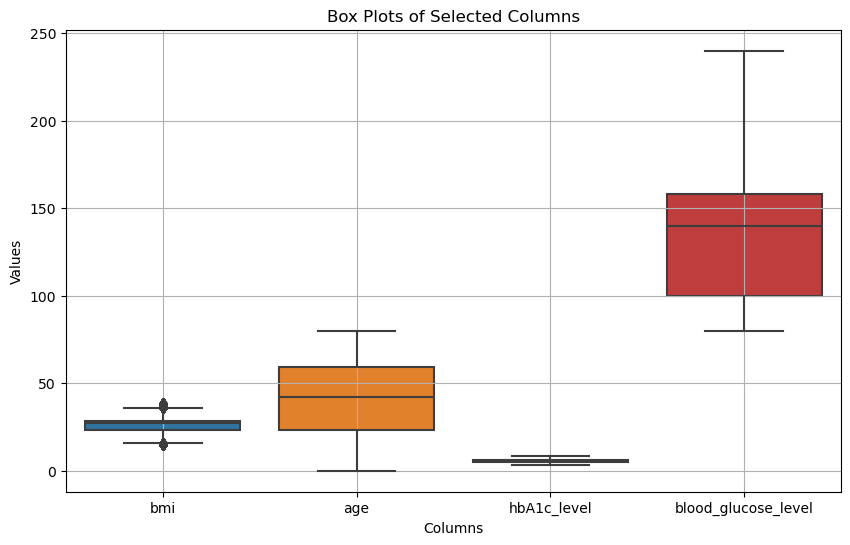

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_check = ['bmi', 'age', 'hbA1c_level', 'blood_glucose_level']
# Melt the dataframe to plot all columns together
df_melted = df.melt(value_vars=columns_to_check)

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=df_melted)

# Add labels and title
plt.title('Box Plots of Selected Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.grid(True)
plt.show()

*since the ranges very substantially (more than 50) we need to normalise these columns*

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [ ]:
# Normalizing the data
scaler = MinMaxScaler()
df_transformed[['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(df_transformed[['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']])

In [ ]:
df_transformed

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,...,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,location
0,2020,0.399399,0,0,0,0,1,0,0,0.530055,...,0.12500,0,0,False,False,0,0,1,0,1
1,2015,0.361862,0,1,0,0,0,0,0,0.220261,...,0.06250,0,0,False,False,0,0,1,0,1
2,2015,0.224224,0,0,0,0,1,0,0,0.380412,...,0.50000,0,1,False,False,0,0,1,0,1
3,2015,0.512012,0,0,1,0,0,0,0,0.530055,...,0.49375,0,1,False,False,0,0,1,0,1
4,2016,0.649650,1,0,0,0,0,0,0,0.379992,...,0.06250,0,0,False,False,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,0.411912,0,0,0,0,1,0,0,0.273224,...,0.06250,0,0,False,False,0,0,1,0,55
99996,2016,1.000000,0,1,0,0,0,0,0,0.922657,...,0.12500,0,0,False,False,0,0,0,0,55
99997,2018,0.574575,0,1,0,0,0,0,0,0.899958,...,0.48750,0,1,False,False,1,0,0,0,55
99998,2018,0.637137,1,0,0,0,0,0,0,0.612863,...,0.46875,0,0,False,False,0,0,0,1,55


### Dimensionality Reduction:

In [ ]:
df_normalized = df_transformed

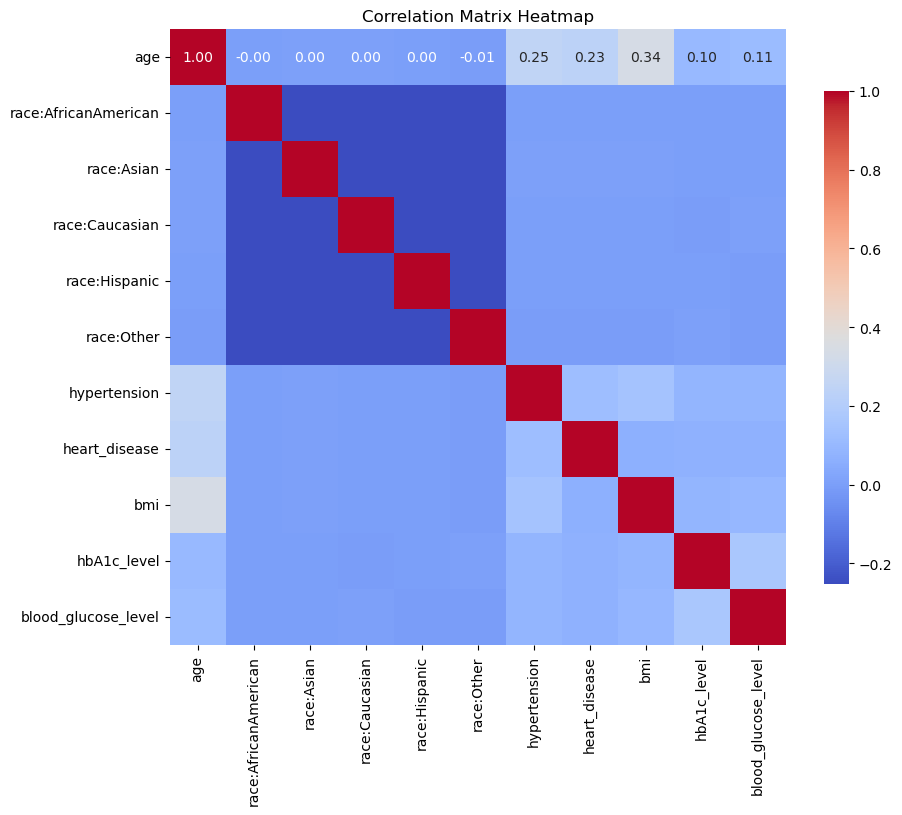

In [ ]:
# Checking Coorealtion
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_normalized.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set the title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [ ]:
# Save to a CSV file
df_normalized.to_csv('diabetes_cleanedDataset2.csv', index=False)

**We are not using dimensionality reduction techniques such as PCA because the correlation analysis of the features in our dataset indicates low correlation coefficients, suggesting that the features are relatively independent. The highest correlation observed is only moderate, while most other features exhibit weak relationships. This independence implies that dimensionality reduction may not significantly improve model performance or reduce complexity without losing important information. Therefore, we will proceed with the original feature set for modeling.**

In [ ]:
df_normalized

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,...,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,location
0,2020,0.399399,0,0,0,0,1,0,0,0.530055,...,0.12500,0,0,False,False,0,0,1,0,1
1,2015,0.361862,0,1,0,0,0,0,0,0.220261,...,0.06250,0,0,False,False,0,0,1,0,1
2,2015,0.224224,0,0,0,0,1,0,0,0.380412,...,0.50000,0,1,False,False,0,0,1,0,1
3,2015,0.512012,0,0,1,0,0,0,0,0.530055,...,0.49375,0,1,False,False,0,0,1,0,1
4,2016,0.649650,1,0,0,0,0,0,0,0.379992,...,0.06250,0,0,False,False,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,0.411912,0,0,0,0,1,0,0,0.273224,...,0.06250,0,0,False,False,0,0,1,0,55
99996,2016,1.000000,0,1,0,0,0,0,0,0.922657,...,0.12500,0,0,False,False,0,0,0,0,55
99997,2018,0.574575,0,1,0,0,0,0,0,0.899958,...,0.48750,0,1,False,False,1,0,0,0,55
99998,2018,0.637137,1,0,0,0,0,0,0,0.612863,...,0.46875,0,0,False,False,0,0,0,1,55


# Implementation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBRFClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    log_loss,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
)


In [ ]:

diabetes_dataset2 = "/content/drive/MyDrive/diabetes_cleanedDataset2.csv"
df = pd.read_csv(diabetes_dataset2, delimiter=",")
df.head()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,...,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,location
0,2020,0.399399,0,0,0,0,1,0,0,0.530055,...,0.12500,0,0,False,False,0,0,1,0,1
1,2015,0.361862,0,1,0,0,0,0,0,0.220261,...,0.06250,0,0,False,False,0,0,1,0,1
2,2015,0.224224,0,0,0,0,1,0,0,0.380412,...,0.50000,0,1,False,False,0,0,1,0,1
3,2015,0.512012,0,0,1,0,0,0,0,0.530055,...,0.49375,0,1,False,False,0,0,1,0,1
4,2016,0.649650,1,0,0,0,0,0,0,0.379992,...,0.06250,0,0,False,False,0,0,1,0,1


In [ ]:
# Drop the 'year' and 'location' columns
df = df.drop(columns=['year', 'location'], errors='ignore')

# Display the updated DataFrame
df.head()

,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.399399,0,0,0,0,1,0,0,0.530055,0.319149,0.12500,0,0,False,False,0,0,1,0
1,0.361862,0,1,0,0,0,0,0,0.220261,0.319149,0.06250,0,0,False,False,0,0,1,0
2,0.224224,0,0,0,0,1,0,0,0.380412,0.276596,0.50000,0,1,False,False,0,0,1,0
3,0.512012,0,0,1,0,0,0,0,0.530055,0.106383,0.49375,0,1,False,False,0,0,1,0
4,0.649650,1,0,0,0,0,0,0,0.379992,0.638298,0.06250,0,0,False,False,0,0,1,0


In [ ]:
def display_diabetes_counts(df):
    counts = df['diabetes'].value_counts()
    print(f"Count of diabetes = 0: {counts[0]}")
    print(f"Count of diabetes = 1: {counts[1]}")

# Call the function
display_diabetes_counts(df)

Count of diabetes = 0: 85878
Count of diabetes = 1: 4495


In [ ]:
!pip install codecarbon


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE
from codecarbon import EmissionsTracker


In [ ]:
# Prepare features and target variable
X = df.drop(columns=['diabetes', 'year', 'location'], errors='ignore')  # Drop less relevant features
y = df['diabetes']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets with stratification to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=0)

# Oversample training set to fix class imbalance
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Also oversample test set (if needed, but usually test set is left untouched)
X_test_smote, y_test_smote = X_test, y_test  # No resampling on test




In [ ]:
import pandas as pd

print("Original training set class distribution:")
print(y_train.value_counts())

print("\nTraining set class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

print("\nOriginal test set class distribution:")
print(y_test.value_counts())

print("\nTest set class distribution after SMOTE:")
print(pd.Series(y_test_smote).value_counts())


Original training set class distribution:
diabetes
0    60115
1     3146
Name: count, dtype: int64

Training set class distribution after SMOTE:
diabetes
0    60115
1    60115
Name: count, dtype: int64

Original test set class distribution:
diabetes
0    25763
1     1349
Name: count, dtype: int64

Test set class distribution after SMOTE:
diabetes
0    25763
1     1349
Name: count, dtype: int64


In [ ]:
from codecarbon import EmissionsTracker
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from codecarbon import EmissionsTracker
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

def train_and_evaluate(model, model_name, X_train, y_train, X_test, y_test):
    tracker = EmissionsTracker()

    try:
        tracker.start()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

        energy_consumed_kwh = tracker.stop()
        energy_consumed_wh = energy_consumed_kwh * 1000

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.show()

        # ROC Curve
        if y_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            plt.figure(figsize=(4, 3))
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {model_name}')
            plt.legend(loc='lower right')
            plt.tight_layout()
            plt.show()

        return {
            'model': model_name,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'roc_auc': auc,
            'energy_consumed': energy_consumed_wh,
            'emissions': None,
            'duration': None
        }

    except Exception as e:
        tracker.stop()
        print(f"Error with {model_name}: {str(e)}")
        return None


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear')
}


[codecarbon WARNING @ 18:47:27] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 18:47:27] [setup] RAM Tracking...
[codecarbon INFO @ 18:47:27] [setup] CPU Tracking...
[codecarbon WARNING @ 18:47:28] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 18:47:28] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 18:47:28] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 18:47:28] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:47:28] [setup] GPU Tracking...
[codecarbon INFO @ 18:47:28] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:47:28] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mode

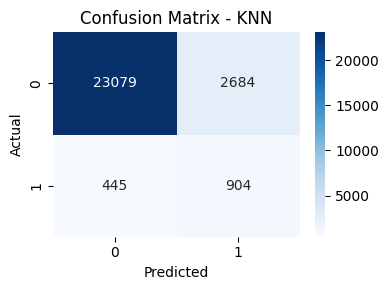

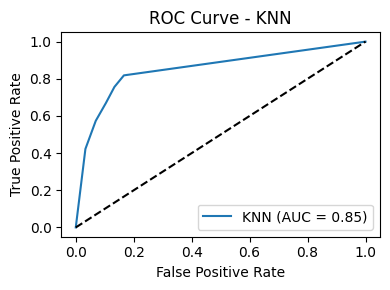

[codecarbon WARNING @ 18:48:14] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 18:48:14] [setup] RAM Tracking...
[codecarbon INFO @ 18:48:14] [setup] CPU Tracking...
[codecarbon WARNING @ 18:48:16] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 18:48:16] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 18:48:16] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 18:48:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:48:16] [setup] GPU Tracking...
[codecarbon INFO @ 18:48:16] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:48:16] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mode

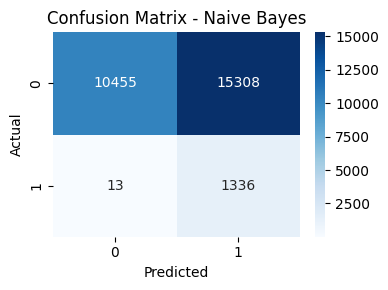

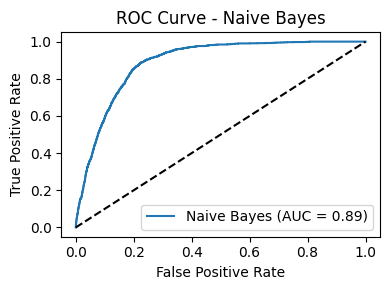

[codecarbon WARNING @ 18:48:16] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 18:48:16] [setup] RAM Tracking...
[codecarbon INFO @ 18:48:16] [setup] CPU Tracking...
[codecarbon WARNING @ 18:48:17] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 18:48:17] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 18:48:17] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 18:48:17] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:48:17] [setup] GPU Tracking...
[codecarbon INFO @ 18:48:17] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:48:17] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mode

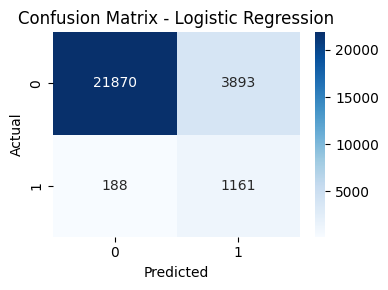

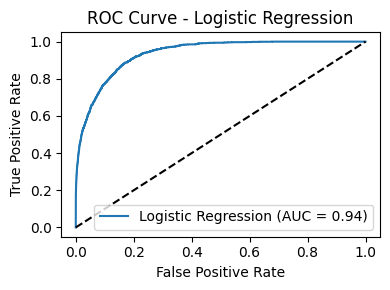

[codecarbon WARNING @ 18:48:19] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 18:48:19] [setup] RAM Tracking...
[codecarbon INFO @ 18:48:19] [setup] CPU Tracking...
[codecarbon WARNING @ 18:48:20] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 18:48:20] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 18:48:20] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 18:48:20] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:48:20] [setup] GPU Tracking...
[codecarbon INFO @ 18:48:20] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:48:20] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mode

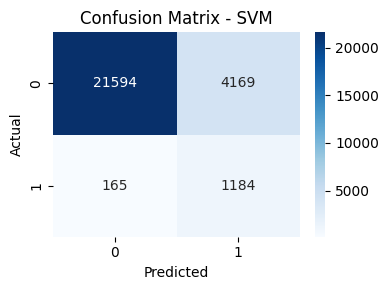

,model,accuracy,precision,recall,f1,roc_auc,energy_consumed,emissions,duration
0,KNN,0.884590,0.251951,0.670126,0.366214,0.851455,0.367815,None,None
1,Naive Bayes,0.434900,0.080269,0.990363,0.148502,0.889123,0.000648,None,None
2,Logistic Regression,0.849476,0.229719,0.860638,0.362643,0.936216,0.004666,None,None
3,SVM,0.840145,0.221184,0.877687,0.353327,NaN,0.009008,None,None


In [ ]:
results = []

for name, model in models.items():
    result = train_and_evaluate(model, name, X_train_smote, y_train_smote, X_test_smote, y_test_smote)
    if result:
        results.append(result)

import pandas as pd

results_df = pd.DataFrame(results)
results_df


In [ ]:
def optimize_model(model, model_name, optimization_technique, X_train, y_train, X_test, y_test):
    optimized_model = None

    if optimization_technique == 'feature_selection':
        from sklearn.feature_selection import SelectKBest, f_classif
        selector = SelectKBest(f_classif, k=5)
        X_train_opt = selector.fit_transform(X_train, y_train)
        X_test_opt = selector.transform(X_test)
        y_train_opt = y_train
        optimized_model = model

    elif optimization_technique == 'parameter_tuning':
        X_train_opt, X_test_opt = X_train, X_test
        y_train_opt = y_train
        optimized_model = model

    elif optimization_technique == 'data_sampling':
        from sklearn.utils import resample
        X_train_opt, y_train_opt = resample(X_train, y_train, n_samples=int(len(X_train)*0.5), random_state=42)
        X_test_opt = X_test
        optimized_model = model

    else:
        X_train_opt, X_test_opt = X_train, X_test
        y_train_opt = y_train
        optimized_model = model

    return train_and_evaluate(
        optimized_model,
        f"{model_name} ({optimization_technique})",
        X_train_opt, y_train_opt, X_test_opt, y_test
    )


[codecarbon WARNING @ 18:56:05] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 18:56:05] [setup] RAM Tracking...
[codecarbon INFO @ 18:56:05] [setup] CPU Tracking...
[codecarbon WARNING @ 18:56:06] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 18:56:06] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 18:56:06] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 18:56:06] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:56:06] [setup] GPU Tracking...
[codecarbon INFO @ 18:56:06] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:56:06] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mode

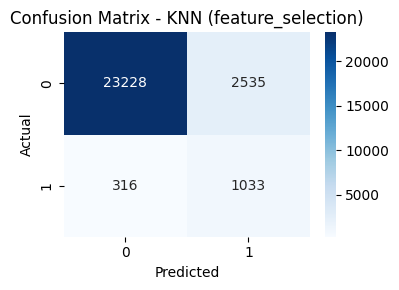

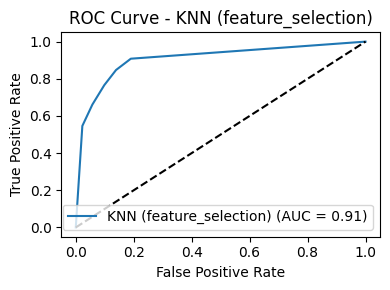

[codecarbon WARNING @ 18:56:10] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 18:56:10] [setup] RAM Tracking...
[codecarbon INFO @ 18:56:10] [setup] CPU Tracking...
[codecarbon WARNING @ 18:56:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 18:56:11] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 18:56:11] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 18:56:11] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:56:11] [setup] GPU Tracking...
[codecarbon INFO @ 18:56:11] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:56:11] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mode

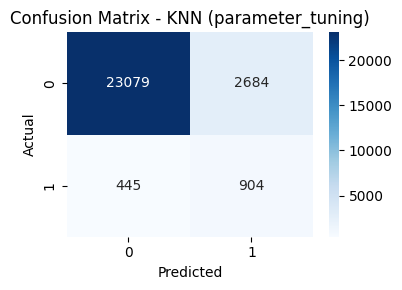

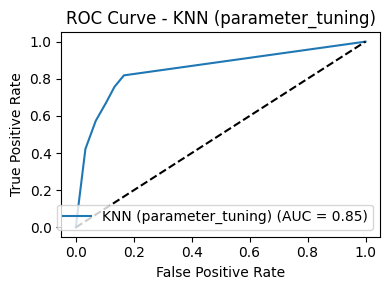

[codecarbon WARNING @ 18:56:51] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 18:56:51] [setup] RAM Tracking...
[codecarbon INFO @ 18:56:51] [setup] CPU Tracking...
[codecarbon WARNING @ 18:56:52] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 18:56:52] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 18:56:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 18:56:52] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:56:52] [setup] GPU Tracking...
[codecarbon INFO @ 18:56:52] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:56:52] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mode

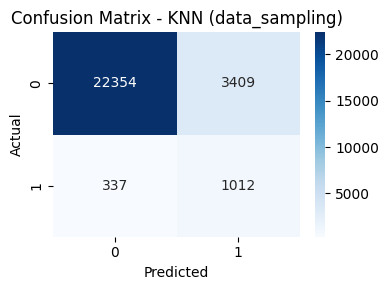

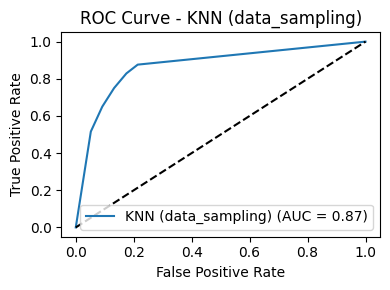

[codecarbon WARNING @ 18:57:12] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 18:57:12] [setup] RAM Tracking...
[codecarbon INFO @ 18:57:12] [setup] CPU Tracking...
[codecarbon WARNING @ 18:57:13] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 18:57:13] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 18:57:13] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 18:57:13] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:57:13] [setup] GPU Tracking...
[codecarbon INFO @ 18:57:13] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:57:13] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mode

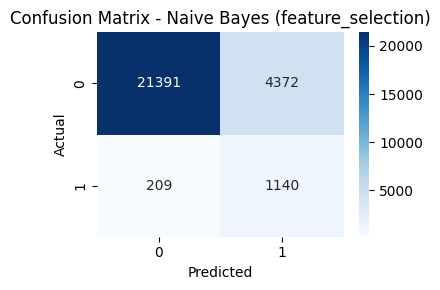

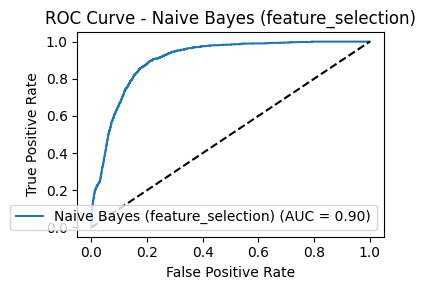

[codecarbon WARNING @ 18:57:14] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 18:57:14] [setup] RAM Tracking...
[codecarbon INFO @ 18:57:14] [setup] CPU Tracking...
[codecarbon WARNING @ 18:57:15] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 18:57:15] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 18:57:15] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 18:57:15] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:57:15] [setup] GPU Tracking...
[codecarbon INFO @ 18:57:15] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:57:15] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mode

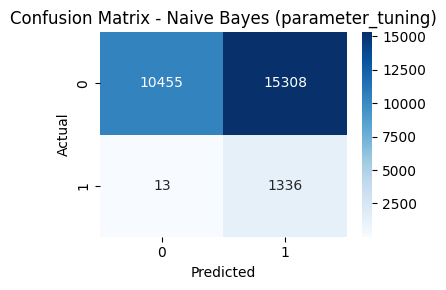

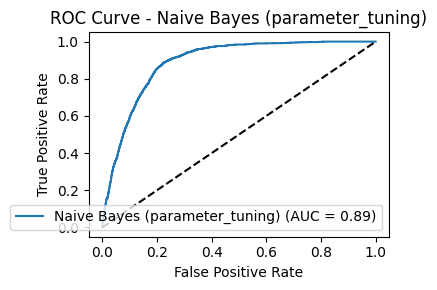

[codecarbon WARNING @ 18:57:16] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 18:57:16] [setup] RAM Tracking...
[codecarbon INFO @ 18:57:16] [setup] CPU Tracking...
[codecarbon WARNING @ 18:57:18] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 18:57:18] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 18:57:18] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 18:57:18] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:57:18] [setup] GPU Tracking...
[codecarbon INFO @ 18:57:18] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:57:18] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mode

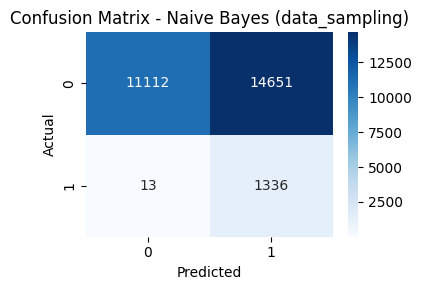

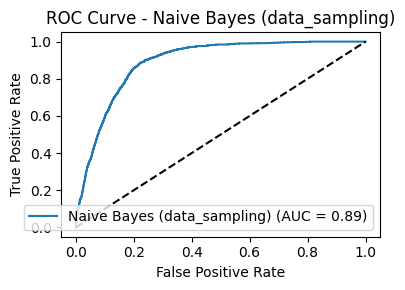

[codecarbon WARNING @ 18:57:19] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 18:57:19] [setup] RAM Tracking...
[codecarbon INFO @ 18:57:19] [setup] CPU Tracking...
[codecarbon WARNING @ 18:57:20] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 18:57:20] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 18:57:20] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 18:57:20] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:57:20] [setup] GPU Tracking...
[codecarbon INFO @ 18:57:20] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:57:20] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mode

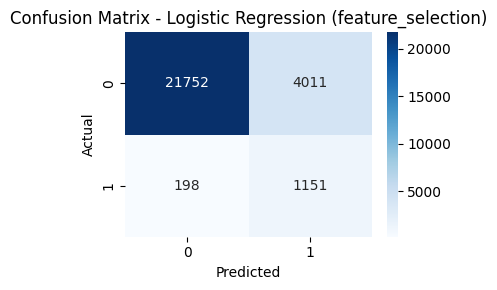

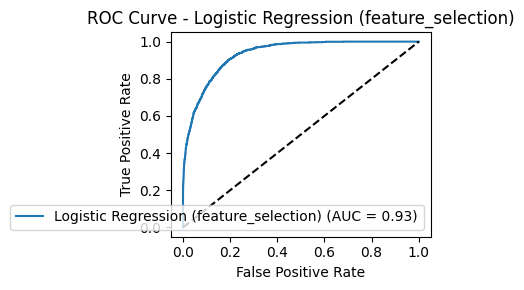

[codecarbon WARNING @ 18:57:21] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 18:57:21] [setup] RAM Tracking...
[codecarbon INFO @ 18:57:21] [setup] CPU Tracking...
[codecarbon WARNING @ 18:57:23] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 18:57:23] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 18:57:23] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 18:57:23] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:57:23] [setup] GPU Tracking...
[codecarbon INFO @ 18:57:23] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:57:23] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mode

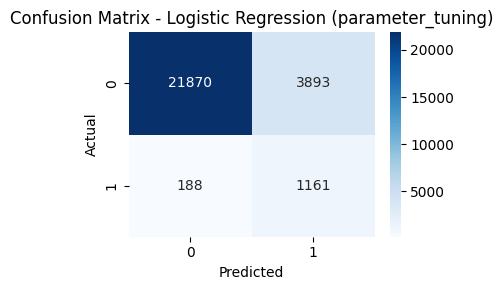

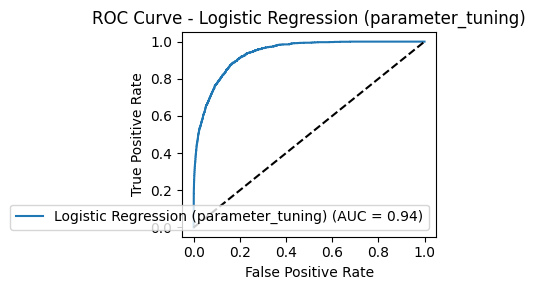

[codecarbon WARNING @ 18:57:24] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 18:57:24] [setup] RAM Tracking...
[codecarbon INFO @ 18:57:24] [setup] CPU Tracking...
[codecarbon WARNING @ 18:57:25] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 18:57:25] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 18:57:25] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 18:57:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:57:25] [setup] GPU Tracking...
[codecarbon INFO @ 18:57:25] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:57:25] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mode

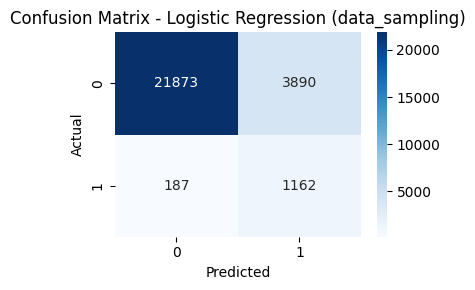

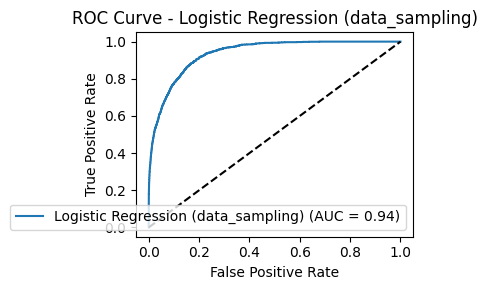

[codecarbon WARNING @ 18:57:26] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 18:57:26] [setup] RAM Tracking...
[codecarbon INFO @ 18:57:26] [setup] CPU Tracking...
[codecarbon WARNING @ 18:57:28] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 18:57:28] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 18:57:28] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 18:57:28] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:57:28] [setup] GPU Tracking...
[codecarbon INFO @ 18:57:28] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:57:28] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mode

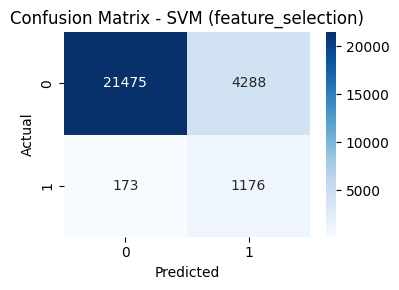

[codecarbon WARNING @ 19:00:13] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 19:00:13] [setup] RAM Tracking...
[codecarbon INFO @ 19:00:13] [setup] CPU Tracking...
[codecarbon WARNING @ 19:00:14] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 19:00:14] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 19:00:14] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 19:00:14] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 19:00:14] [setup] GPU Tracking...
[codecarbon INFO @ 19:00:14] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 19:00:14] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mode

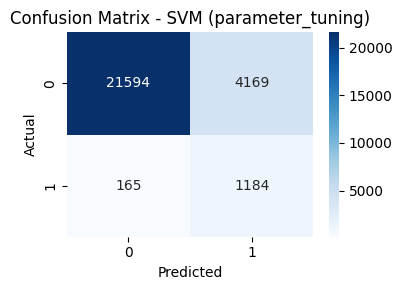

[codecarbon WARNING @ 19:03:51] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 19:03:51] [setup] RAM Tracking...
[codecarbon INFO @ 19:03:51] [setup] CPU Tracking...
[codecarbon WARNING @ 19:03:52] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 19:03:52] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 19:03:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 19:03:52] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 19:03:52] [setup] GPU Tracking...
[codecarbon INFO @ 19:03:52] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 19:03:52] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mode

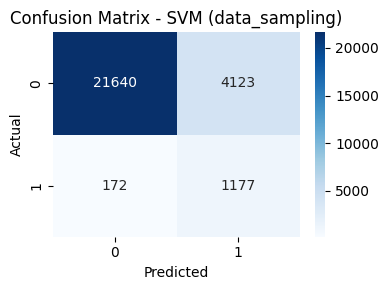

,model,accuracy,precision,recall,f1,roc_auc,energy_consumed,emissions,duration
0,KNN (feature_selection),0.894844,0.289518,0.765752,0.420175,0.906687,0.025955,None,None
1,KNN (parameter_tuning),0.884590,0.251951,0.670126,0.366214,0.851455,0.313429,None,None
2,KNN (data_sampling),0.861832,0.228907,0.750185,0.350780,0.869359,0.000779,None,None
3,Naive Bayes (feature_selection),0.831034,0.206821,0.845070,0.332313,0.903521,0.000291,None,None
4,Naive Bayes (parameter_tuning),0.434900,0.080269,0.990363,0.148502,0.889123,0.000004,None,None
5,Naive Bayes (data_sampling),0.459132,0.083568,0.990363,0.154130,0.889540,0.000661,None,None
6,Logistic Regression (feature_selection),0.844755,0.222976,0.853225,0.353556,0.933185,0.000011,None,None
7,Logistic Regression (parameter_tuning),0.849476,0.229719,0.860638,0.362643,0.936216,0.000022,None,None
8,Logistic Regression (data_sampling),0.849624,0.230008,0.861379,0.363068,0.936159,0.002683,None,None
9,SVM (feature_selection),0.835460,0.215227,0.871757,0.345222,NaN,1.331201,None,None


In [ ]:
optimization_results = []
techniques = ['feature_selection', 'parameter_tuning', 'data_sampling']

for name, model in models.items():
    for technique in techniques:
        result = optimize_model(model, name, technique, X_train_smote, y_train_smote, X_test_smote, y_test_smote)
        if result:
            optimization_results.append(result)

optimization_df = pd.DataFrame(optimization_results)
optimization_df


In [ ]:
all_results = pd.concat([results_df, optimization_df])

all_results['accuracy_per_wh'] = all_results['accuracy'] / all_results['energy_consumed']
all_results['f1_per_wh'] = all_results['f1'] / all_results['energy_consumed']

all_results


,model,accuracy,precision,recall,f1,roc_auc,energy_consumed,emissions,duration,accuracy_per_wh,f1_per_wh
0,KNN,0.884590,0.251951,0.670126,0.366214,0.851455,0.367815,None,None,2.404987,0.995649
1,Naive Bayes,0.434900,0.080269,0.990363,0.148502,0.889123,0.000648,None,None,671.610387,229.330171
2,Logistic Regression,0.849476,0.229719,0.860638,0.362643,0.936216,0.004666,None,None,182.059570,77.721467
3,SVM,0.840145,0.221184,0.877687,0.353327,NaN,0.009008,None,None,93.267517,39.224161
0,KNN (feature_selection),0.894844,0.289518,0.765752,0.420175,0.906687,0.025955,None,None,34.476943,16.188690
1,KNN (parameter_tuning),0.884590,0.251951,0.670126,0.366214,0.851455,0.313429,None,None,2.822295,1.168411
2,KNN (data_sampling),0.861832,0.228907,0.750185,0.350780,0.869359,0.000779,None,None,1106.453405,450.344651
3,Naive Bayes (feature_selection),0.831034,0.206821,0.845070,0.332313,0.903521,0.000291,None,None,2851.907853,1140.417847
4,Naive Bayes (parameter_tuning),0.434900,0.080269,0.990363,0.148502,0.889123,0.000004,None,None,102415.888460,34971.247691
5,Naive Bayes (data_sampling),0.459132,0.083568,0.990363,0.154130,0.889540,0.000661,None,None,694.285922,233.070813


<ipython-input-21-58f8c26a7fdc>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


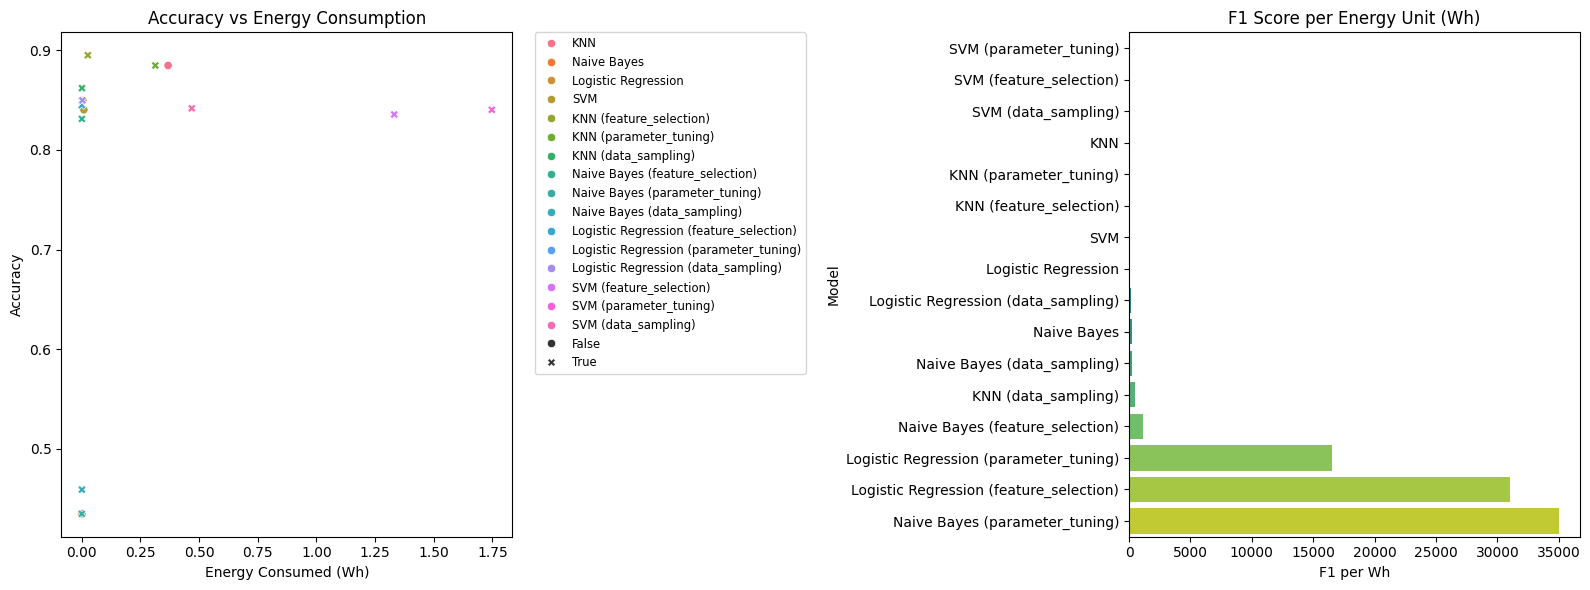

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))

# Plot 1: Accuracy vs Energy Consumption
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=all_results,
    x='energy_consumed',
    y='accuracy',
    hue='model',
    style=all_results['model'].str.contains('\(')
)
plt.title('Accuracy vs Energy Consumption')
plt.xlabel('Energy Consumed (Wh)')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')

# Plot 2: F1 Score per Energy Unit (Horizontal barplot)
plt.subplot(1, 2, 2)
sorted_data = all_results.sort_values('f1_per_wh', ascending=True)
sns.barplot(
    data=sorted_data,
    y='model', x='f1_per_wh',
    palette='viridis'
)
plt.title('F1 Score per Energy Unit (Wh)')
plt.xlabel('F1 per Wh')
plt.ylabel('Model')
plt.tight_layout()
plt.show()


In [ ]:
print("Performance Summary (incl. ROC AUC):")
print(all_results[['model', 'accuracy', 'f1', 'roc_auc', 'energy_consumed', 'accuracy_per_wh', 'f1_per_wh']]
      .sort_values('f1_per_wh', ascending=False))


Performance Summary (incl. ROC AUC):
                                      model  accuracy        f1   roc_auc  \
4            Naive Bayes (parameter_tuning)  0.434900  0.148502  0.889123   
6   Logistic Regression (feature_selection)  0.844755  0.353556  0.933185   
7    Logistic Regression (parameter_tuning)  0.849476  0.362643  0.936216   
3           Naive Bayes (feature_selection)  0.831034  0.332313  0.903521   
2                       KNN (data_sampling)  0.861832  0.350780  0.869359   
5               Naive Bayes (data_sampling)  0.459132  0.154130  0.889540   
1                               Naive Bayes  0.434900  0.148502  0.889123   
8       Logistic Regression (data_sampling)  0.849624  0.363068  0.936159   
2                       Logistic Regression  0.849476  0.362643  0.936216   
3                                       SVM  0.840145  0.353327       NaN   
0                   KNN (feature_selection)  0.894844  0.420175  0.906687   
1                    KNN (parameter_tun

**Summary:**
* Logistic Regression offers best balance of performance and energy efficiency.
* KNN excels in accuracy but at much higher energy cost.
* Naive Bayes is extremely energy-efficient but with poor accuracy.
* SVM models consume the most energy without clear performance gain.






